<a href="https://colab.research.google.com/github/arifduet/Machine-Learning-Project/blob/main/ECG%20signal%20Classification%20using%20CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Connect to Google Drive
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
#path location on google Drive
file_path_train = '/content/drive/My Drive/csv file/mitbih_train.csv/mitbih_train.csv'
file_path_test = '/content/drive/My Drive/csv file/mitbih_test.csv/mitbih_test.csv'

In [ ]:
#Import Library
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.metrics import classification_report, confusion_matrix
from collections import Counter
from sklearn.preprocessing import OneHotEncoder
# import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, GRU, Dense, Dropout, Flatten, Input
from tensorflow.keras.metrics import AUC
# from tensorflow.keras.utils import to_categorical
from keras.callbacks import ModelCheckpoint, EarlyStopping
from sklearn.utils import resample
from keras.models import load_model

In [ ]:
df_train = pd.read_csv(file_path_train, header=None)
df_test = pd.read_csv(file_path_test, header=None)
df_train, df_validation = train_test_split(df_train, test_size=0.2, random_state=42, stratify=df_train.iloc[:, -1])
# iloc is the pandas indexer. its syntax=> iloc[rows,column] ( : => select all rows, -1 => select from the last column)
# (test_size=0.2) => means 20% of the data will be assigned to the "test" set, and the remaining 80% will be used for the "training" set.

In [ ]:
############ Train Data #############
num_columns = df_train.shape[1]   #df_train.shape[1] => returns the number of features in the training dataset.
new_column_names = list(range(num_columns))
df_train.columns = new_column_names
print("Shape of Train Data: ", df_train.shape)
df_train.head()    #df_train.head() => will display the first 5 rows of the DataFrame

Shape of Train Data:  (70043, 188)


,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,187
14872,0.053191,0.162234,0.292553,0.441489,0.521277,0.627660,0.747340,0.784574,0.779255,0.795213,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
50486,0.974265,0.867647,0.591912,0.312500,0.128676,0.022059,0.000000,0.014706,0.044118,0.055147,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
84864,0.752322,0.637771,0.540248,0.411765,0.272446,0.151703,0.086687,0.023220,0.024768,0.043344,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
71041,0.977654,0.916201,0.614525,0.364991,0.327747,0.294227,0.240223,0.210428,0.178771,0.152700,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
78758,0.015464,0.000000,0.033505,0.108247,0.203608,0.269330,0.349227,0.444588,0.511598,0.600515,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0


In [ ]:
############ Validation Data #############
num_columns = df_validation.shape[1]        #df_validation.shape[1] => refers to the number of columns
new_column_names = list(range(num_columns))
df_validation.columns = new_column_names
print("Shape of Validation Data: ", df_validation.shape)
df_validation.head()

Shape of Validation Data:  (17511, 188)


,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,187
32695,1.000000,0.904523,0.670017,0.408710,0.226131,0.212730,0.246231,0.259631,0.269682,0.274707,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
57704,1.000000,0.977089,0.773585,0.548518,0.504043,0.491914,0.450135,0.448787,0.448787,0.444744,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
69505,0.994253,0.798851,0.448276,0.146552,0.043103,0.028736,0.043103,0.043103,0.057471,0.045977,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
16459,0.964960,0.423181,0.280323,0.172507,0.080863,0.053908,0.037736,0.037736,0.029650,0.026954,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
57169,0.991770,0.874486,0.088477,0.010288,0.000000,0.032922,0.076132,0.106996,0.092593,0.109053,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
############ Test Data #############
num_columns = df_test.shape[1]      #df_test.shape[1] => gives the number of columns (features)
new_column_names = list(range(num_columns))
df_test.columns = new_column_names
print("Shape of Test Data: ", df_test.shape)
df_test.head()

Shape of Test Data:  (21892, 188)


,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,187
0,1.000000,0.758264,0.111570,0.000000,0.080579,0.078512,0.066116,0.049587,0.047521,0.035124,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.908425,0.783883,0.531136,0.362637,0.366300,0.344322,0.333333,0.307692,0.296703,0.300366,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.730088,0.212389,0.000000,0.119469,0.101770,0.101770,0.110619,0.123894,0.115044,0.132743,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.000000,0.910417,0.681250,0.472917,0.229167,0.068750,0.000000,0.004167,0.014583,0.054167,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.570470,0.399329,0.238255,0.147651,0.000000,0.003356,0.040268,0.080537,0.070470,0.090604,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
# Separate features and labels
X_train = df_train.iloc[:, :-1]
y_train = df_train.iloc[:, -1]
X_validation = df_validation.iloc[:, :-1]
y_validation = df_validation.iloc[:, -1]
X_test = df_test.iloc[:, :-1]
y_test = df_test.iloc[:, -1]

In [ ]:
# One-hot encode the labels
#OneHotEncoder is a preprocessing technique used to convert categorical variables into a numerical format.
encoder = OneHotEncoder(sparse_output=False)       #sparse_output=False => is a dense array, where all values are explicitly stored.
y_train_encoded = encoder.fit_transform(y_train.values.reshape(-1, 1))
y_validation_encoded = encoder.fit_transform(y_validation.values.reshape(-1, 1))
y_test_encoded = encoder.fit_transform(y_test.values.reshape(-1, 1))
y_train_encoded = y_train_encoded.astype(np.uint8) #y_train_encoded.astype(np.uint8) =>convert the data type of the array y_train_encoded to np.uint8, which stands for an 8-bit unsigned integer.
y_validation_encoded = y_validation_encoded.astype(np.uint8)
y_test_encoded = y_test_encoded.astype(np.uint8)

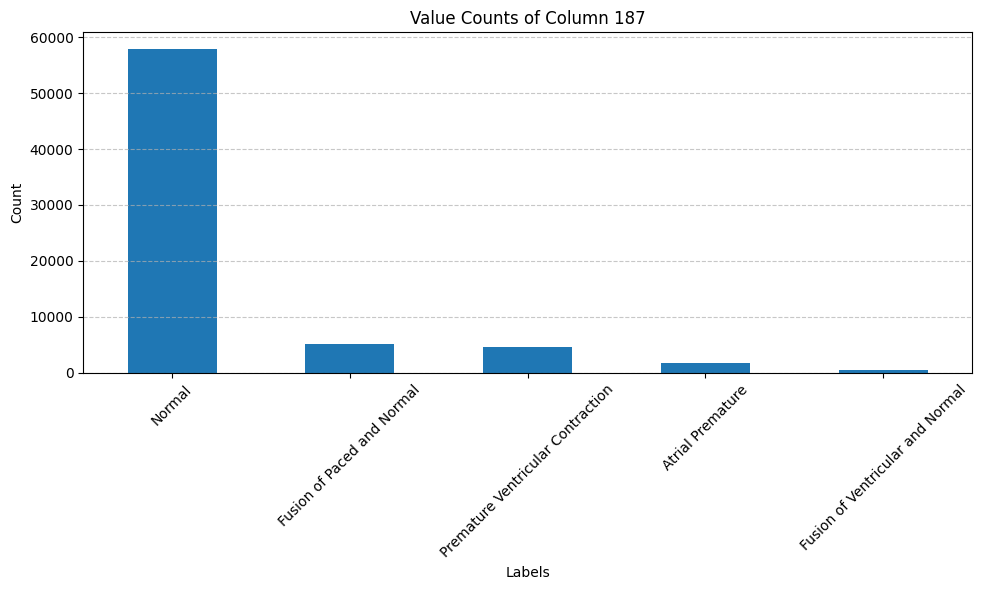

,count
187,
Normal,57977
Fusion of Paced and Normal,5145
Premature Ventricular Contraction,4630
Atrial Premature,1778
Fusion of Ventricular and Normal,513


In [ ]:
# Last column is the corresponded labels
value_counts = df_train[187].value_counts() #df_train[187] => This refers to a specific column in the DataFrame  index 187 refers to 188th column).
id_to_label = {
    0: "Normal",
    1: "Atrial Premature",
    2: "Premature Ventricular Contraction",
    3: "Fusion of Ventricular and Normal",
    4: "Fusion of Paced and Normal"
}
value_counts.index = value_counts.index.map(id_to_label) #The map =>  function is used to apply a function or a mapping from a dictionary to each element in a Series.
plt.figure(figsize=(10, 6))
value_counts.plot(kind='bar')
plt.title('Value Counts of Column 187')
plt.xlabel('Labels')
plt.ylabel('Count')
plt.xticks(rotation=45) #plt.xticks(rotation=45) => function in Matplotlib is used to rotate the x-axis tick labels by 45 degrees.
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout() #ensures that titles and labels for each subplot do not overlap with each other.
plt.show()
value_counts

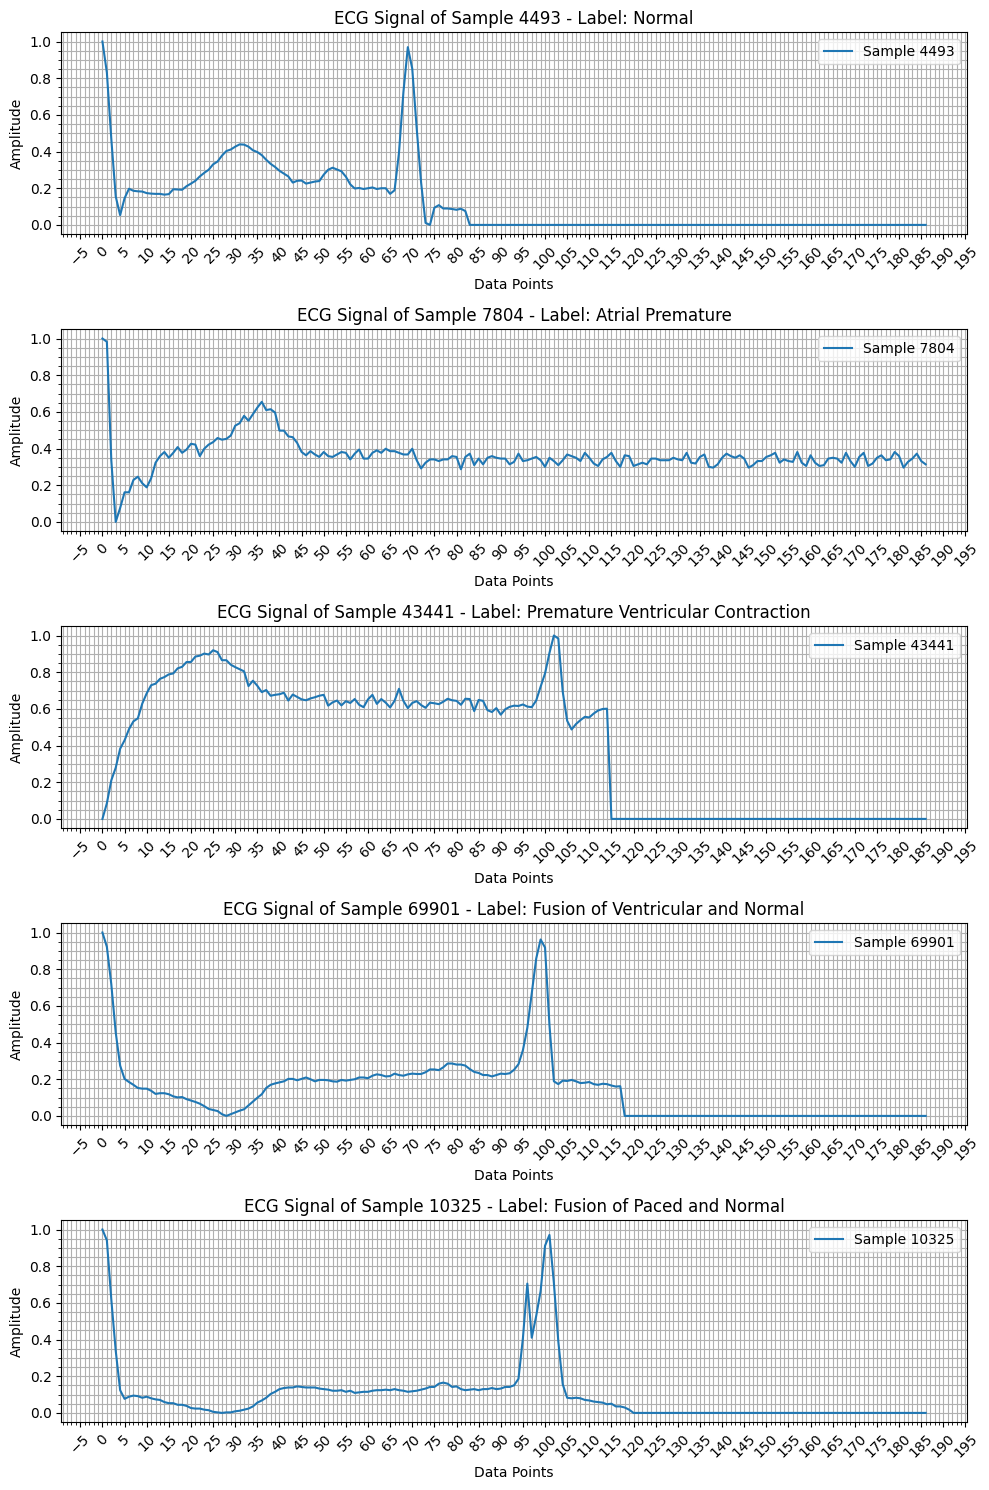

In [ ]:
def plot_one_ecg_per_label(X, y, id_to_label):
    unique_labels = id_to_label.keys()
    plt.figure(figsize=(10, len(unique_labels) * 3))
    for i, label in enumerate(unique_labels):
        label_indices = np.where(y == label)[0]
        if len(label_indices) == 0:
            print(f"No samples found with label {label}.")
            continue
        selected_index = np.random.choice(label_indices, 1)[0] #[0] => extracts the single sampled value from this array.
        plt.subplot(len(unique_labels), 1, i + 1)
        plt.plot(X.iloc[selected_index], label=f'Sample {selected_index}')
        plt.title(f'ECG Signal of Sample {selected_index} - Label: {id_to_label[label]}')
        plt.xlabel('Data Points')
        plt.ylabel('Amplitude')
        plt.xticks(rotation=45)
        plt.grid(True, which='both', axis='both')
        plt.minorticks_on()
        plt.gca().xaxis.set_major_locator(plt.MultipleLocator(5))
        plt.gca().xaxis.set_minor_locator(plt.MultipleLocator(1))
        plt.legend()

    plt.tight_layout()
    plt.show()
plot_one_ecg_per_label(X_train, y_train, id_to_label)

In [ ]:
def add_gaussian_noise(ecg_data, mean=0, std=0.01): #add Gaussian (or normal) noise to a given dataset,default mean=0 ,Standard Deviation is 0.01
    noise = np.random.normal(mean, std, ecg_data.shape)
    return ecg_data + noise

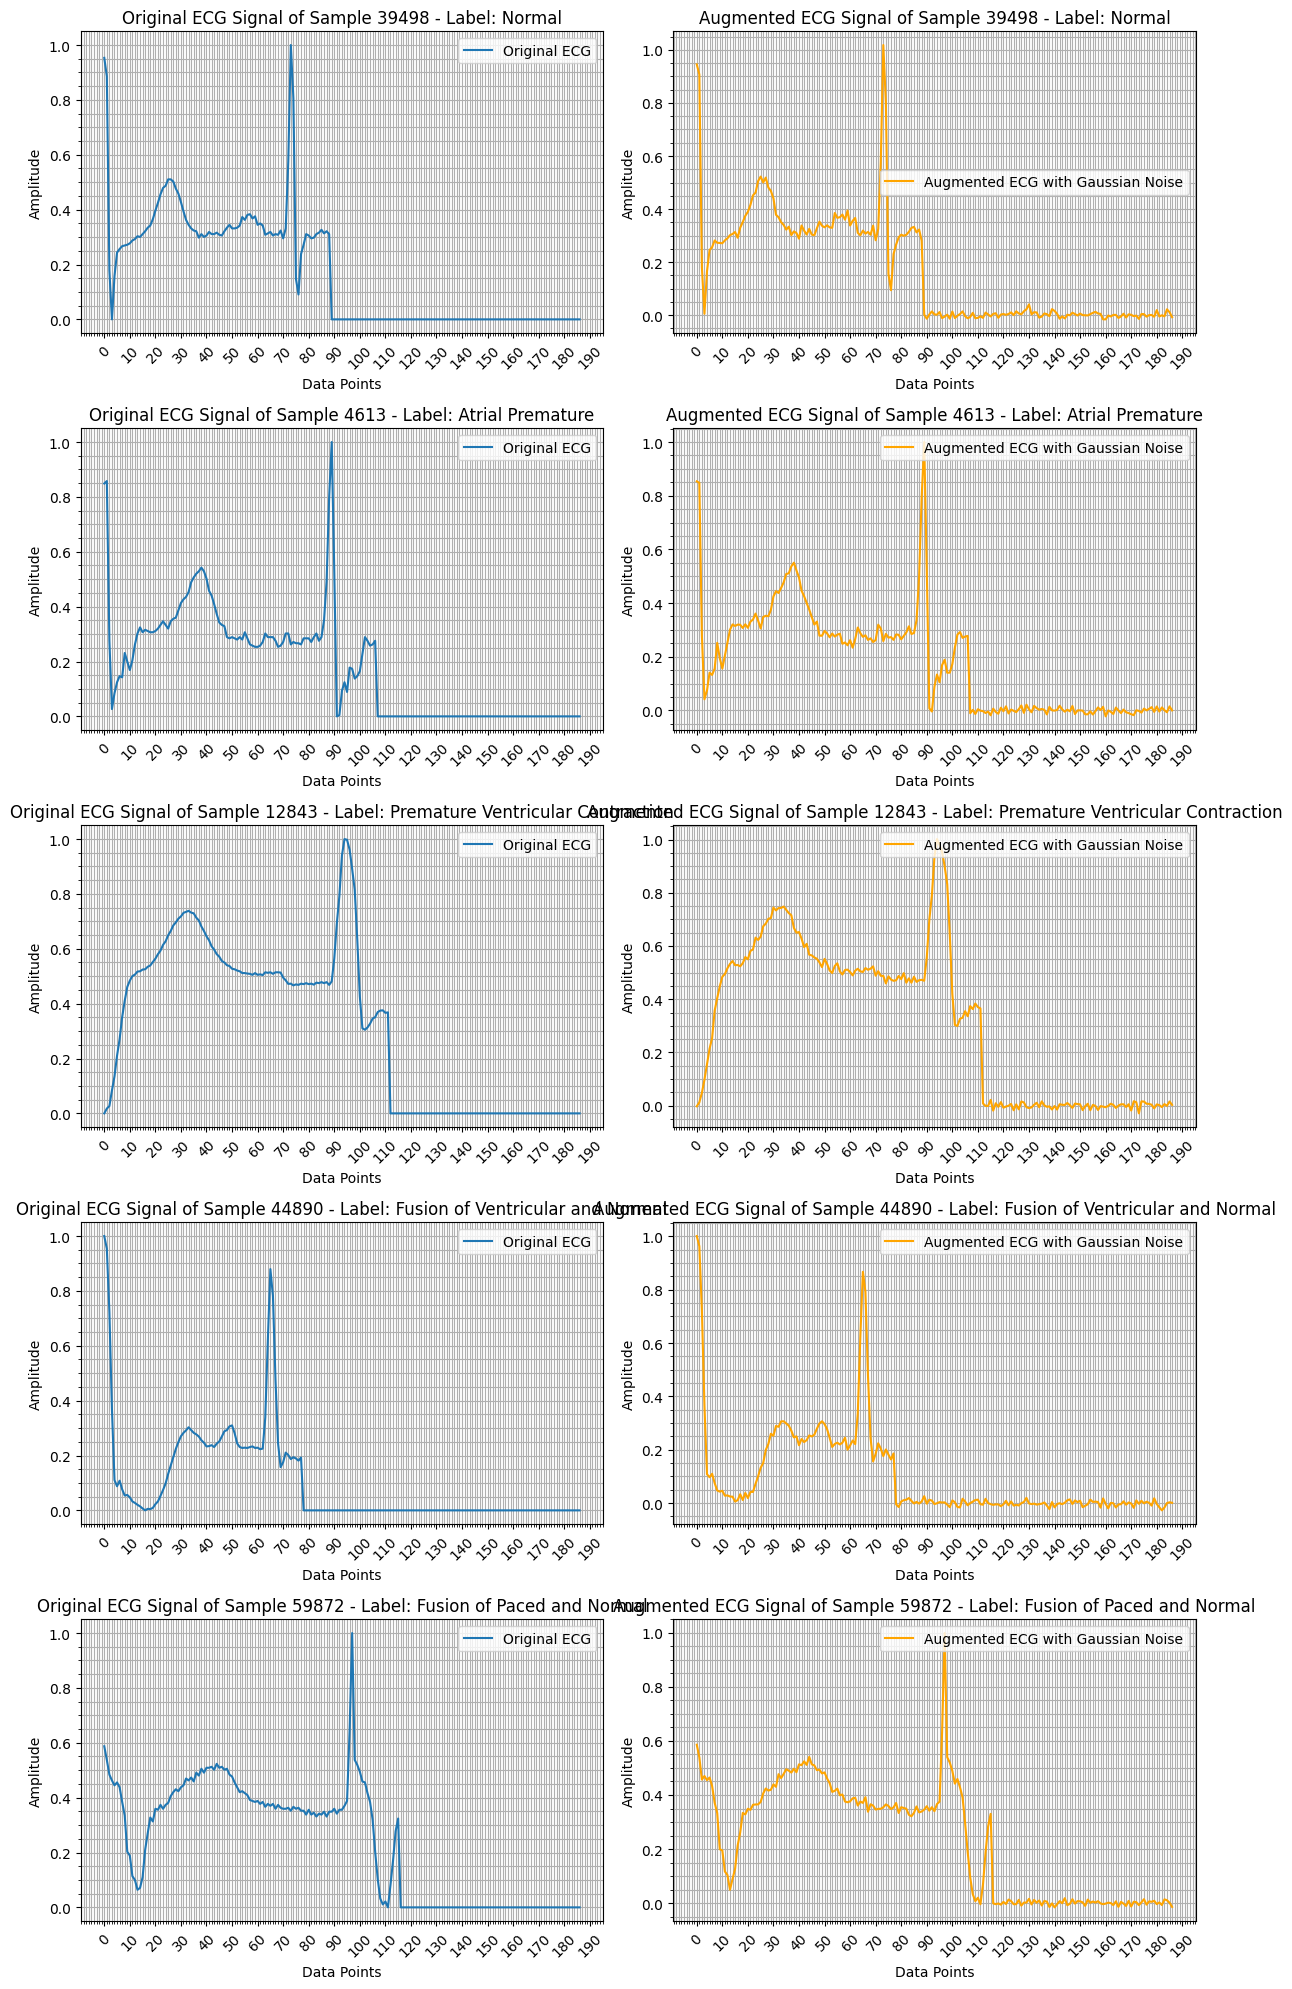

In [ ]:
def plot_one_ecg_and_augmented_by_label(X, y, id_to_label, noise_mean=0, noise_std=0.01):
    unique_labels = id_to_label.keys()
    plt.figure(figsize=(12, len(unique_labels) * 4))
    for i, label in enumerate(unique_labels):
        label_indices = np.where(y == label)[0]
        if len(label_indices) == 0:
            print(f"No samples found with label {label}.")
            continue
        selected_index = np.random.choice(label_indices, 1)[0]
        original_ecg = X.iloc[selected_index]
        augmented_ecg = add_gaussian_noise(original_ecg, mean=noise_mean, std=noise_std)
        plt.subplot(len(unique_labels), 2, 2 * i + 1)
        plt.plot(original_ecg, label='Original ECG')
        plt.title(f'Original ECG Signal of Sample {selected_index} - Label: {id_to_label[label]}')
        plt.xlabel('Data Points')
        plt.ylabel('Amplitude')
        plt.xticks(rotation=45)
        plt.grid(True, which='both', axis='both')
        plt.minorticks_on()
        plt.gca().xaxis.set_major_locator(plt.MultipleLocator(10))
        plt.gca().xaxis.set_minor_locator(plt.MultipleLocator(1))
        plt.legend()
        plt.subplot(len(unique_labels), 2, 2 * i + 2)
        plt.plot(augmented_ecg, label='Augmented ECG with Gaussian Noise', color='orange')
        plt.title(f'Augmented ECG Signal of Sample {selected_index} - Label: {id_to_label[label]}')
        plt.xlabel('Data Points')
        plt.ylabel('Amplitude')
        plt.xticks(rotation=45)
        plt.grid(True, which='both', axis='both')
        plt.minorticks_on()
        plt.gca().xaxis.set_major_locator(plt.MultipleLocator(10))
        plt.gca().xaxis.set_minor_locator(plt.MultipleLocator(1))
        plt.legend()

    plt.tight_layout()
    plt.show()
plot_one_ecg_and_augmented_by_label(X_train, y_train, id_to_label)

In [ ]:
def augment_and_balance_data(X, y, majority_label, downsample_target_count, target_label_count):
    majority_indices = np.where(y == majority_label)[0]
    minority_indices = np.where(y != majority_label)[0]
    X_majority = X.iloc[majority_indices]
    y_majority = y.iloc[majority_indices]
    X_minority = X.iloc[minority_indices]
    y_minority = y.iloc[minority_indices]
    X_majority_downsampled, y_majority_downsampled = resample(X_majority, y_majority,replace=False,n_samples=downsample_target_count,random_state=42)
    X_combined = pd.concat([X_majority_downsampled, X_minority])
    y_combined = pd.concat([y_majority_downsampled, y_minority])
    augmented_X = X_combined.copy()
    augmented_y = y_combined.copy()
    label_counts = Counter(y_combined)
    for label, count in label_counts.items():
        if count < target_label_count:
            label_indices = np.where(y_combined == label)[0]
            num_to_augment = target_label_count - count
            for _ in range(num_to_augment):
                original_index = np.random.choice(label_indices)
                original_sample = X_combined.iloc[original_index]
                augmented_sample = add_gaussian_noise(original_sample)
                augmented_X = augmented_X._append(pd.Series(augmented_sample, index=augmented_X.columns), ignore_index=True)
                augmented_y = augmented_y._append(pd.Series(label), ignore_index=True)
    return augmented_X, augmented_y
label_counts = Counter(y_train)
second_most_common_count = sorted(label_counts.values())[-2]
target_label_count = second_most_common_count
augmented_X, augmented_y = augment_and_balance_data(X_train, y_train, majority_label=0,downsample_target_count=target_label_count,target_label_count=target_label_count)
print(Counter(augmented_y))

Counter({0.0: 5145, 4.0: 5145, 2.0: 5145, 1.0: 5145, 3.0: 5145})


In [ ]:
# One-hot encode the labels
encoder = OneHotEncoder(sparse_output=False)
augmented_y_encoded = encoder.fit_transform(augmented_y.values.reshape(-1, 1))
augmented_y_encoded = augmented_y_encoded.astype(np.uint8)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Conv1D, MaxPooling1D, Flatten, Dense, Dropout

def create_cnn_model(input_shape, num_classes):
    model = Sequential([
        Input(shape=input_shape),

        # First Convolutional Layer
        Conv1D(filters=64, kernel_size=3, activation='relu'),
        MaxPooling1D(pool_size=2),

        # Second Convolutional Layer
        Conv1D(filters=128, kernel_size=3, activation='relu'),
        MaxPooling1D(pool_size=2),

        # Flatten the output
        Flatten(),

        # Fully connected Dense Layer
        Dense(units=64, activation='relu'),
        Dropout(0.5),

        # Output Layer
        Dense(units=num_classes, activation='softmax')
    ])

    # Compile the model
    model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

    return model

# Assuming X_train has the appropriate shape
model = create_cnn_model(input_shape=(X_train.shape[1], 1), num_classes=5)
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv1d (Conv1D)                      │ (None, 185, 64)             │             256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d (MaxPooling1D)         │ (None, 92, 64)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_1 (Conv1D)                    │ (None, 90, 128)             │          24,704 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_1 (MaxPooling1D)       │ (None, 45, 128)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 5760)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │         368,704 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 5)                   │             325 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 393,989 (1.50 MB)

 Trainable params: 393,989 (1.50 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Input, Conv1D, Dropout, GRU, Bidirectional, Flatten, Dense, BatchNormalization, LSTM
# from tensorflow.keras.optimizers import Adam
# #from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

# def create_model(input_shape, num_classes):
#     """
#     Create a Sequential model with an optimized architecture for better accuracy and reasonable time complexity.
#     """
#     model = Sequential([
#         # Input and initial Conv1D layers
#         Input(shape=input_shape),
#         Conv1D(filters=128, kernel_size=3, activation='relu', padding='same'),
#         BatchNormalization(),  # Add Batch Normalization to speed up training and improve stability
#         Dropout(0.3),  # Lower Dropout to avoid underfitting

#         # Second Conv1D Layer with more filters for better feature extraction
#         Conv1D(filters=64, kernel_size=3, activation='relu', padding='same'),
#         BatchNormalization(),
#         Dropout(0.3),

#         # GRU Layer with Bidirectionality for better sequence learning
#         Bidirectional(GRU(units=64, return_sequences=True)),
#         Dropout(0.4),

#         # LSTM Layer (you can replace this with GRU for better time complexity if needed)
#         LSTM(units=32, return_sequences=False), # only output the last hidden state of the sequence

#         # Flattening the output
#         Flatten(),

#         # Dense Layers for final classification
#         Dense(units=128, activation='relu'),
#         BatchNormalization(),
#         Dropout(0.4),

#         Dense(units=64, activation='relu'),
#         Dropout(0.3),

#         # Final layer with softmax for multi-class classification
#         Dense(units=num_classes, activation='softmax')
#     ])

#     # Compile the model with a lower learning rate for better accuracy
#     optimizer = Adam(learning_rate=0.0005)  # Lower learning rate for more stable training
#     model.compile(optimizer=optimizer,
#                   loss='categorical_crossentropy',
#                   metrics=['accuracy'])

#     return model

In [ ]:
# Reshape X data to fit the Conv1D input shape (samples, time steps, features)
augmented_X_reshaped = augmented_X.values.reshape(augmented_X.shape[0], augmented_X.shape[1], 1)
X_validation_reshaped = X_validation.values.reshape(X_validation.shape[0], X_validation.shape[1], 1)
X_test_reshaped = X_test.values.reshape(X_test.shape[0], X_test.shape[1], 1)

In [ ]:
save_dir = '/kaggle/working/'
if not os.path.exists(save_dir):
    os.makedirs(save_dir)
model.save(os.path.join(save_dir, "EarlyStopping_BestModel.keras"))

NameError: name 'model' is not defined

In [ ]:
# Train the model
model = create_cnn_model(input_shape=(X_train.shape[1], 1), num_classes=5)
history = model.fit(augmented_X_reshaped, augmented_y_encoded,
                    validation_data=(X_validation_reshaped, y_validation_encoded),
                    epochs=20, batch_size=32)

Epoch 1/20
804/804 ━━━━━━━━━━━━━━━━━━━━ 29s 34ms/step - accuracy: 0.6792 - loss: 0.8430 - val_accuracy: 0.9025 - val_loss: 0.3227
Epoch 2/20
804/804 ━━━━━━━━━━━━━━━━━━━━ 29s 36ms/step - accuracy: 0.8811 - loss: 0.3388 - val_accuracy: 0.9151 - val_loss: 0.2940
Epoch 3/20
804/804 ━━━━━━━━━━━━━━━━━━━━ 29s 36ms/step - accuracy: 0.9081 - loss: 0.2632 - val_accuracy: 0.9226 - val_loss: 0.2523
Epoch 4/20
804/804 ━━━━━━━━━━━━━━━━━━━━ 39s 34ms/step - accuracy: 0.9189 - loss: 0.2371 - val_accuracy: 0.9359 - val_loss: 0.2138
Epoch 5/20
804/804 ━━━━━━━━━━━━━━━━━━━━ 43s 37ms/step - accuracy: 0.9243 - loss: 0.2130 - val_accuracy: 0.9316 - val_loss: 0.2237
Epoch 6/20
804/804 ━━━━━━━━━━━━━━━━━━━━ 27s 33ms/step - accuracy: 0.9367 - loss: 0.1824 - val_accuracy: 0.9607 - val_loss: 0.1506
Epoch 7/20
804/804 ━━━━━━━━━━━━━━━━━━━━ 41s 33ms/step - accuracy: 0.9417 - loss: 0.1667 - val_accuracy: 0.9325 - val_loss: 0.2237
Epoch 8/20
804/804 ━━━━━━━━━━━━━━━━━━━━ 41s 33ms/step - accuracy: 0.9483 - loss: 0.1500 - 

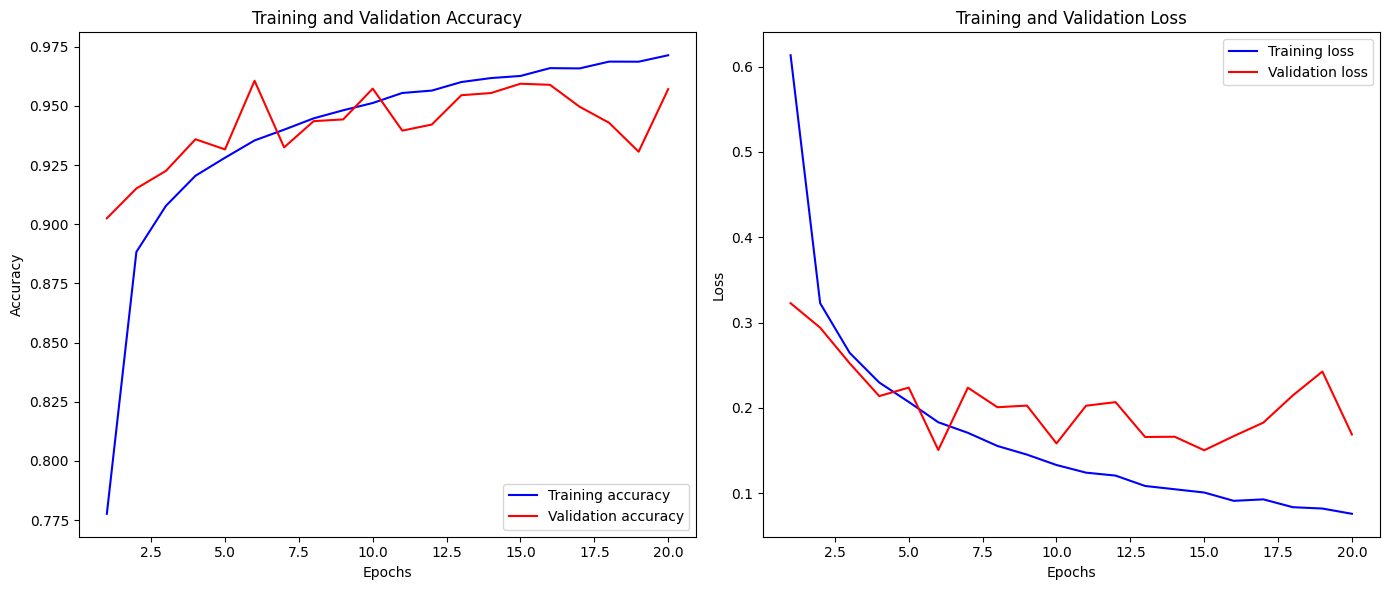

In [ ]:
def plot_training_history(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs = range(1, len(acc) + 1)
    plt.figure(figsize=(14, 6))
    plt.subplot(1, 2, 1)
    plt.plot(epochs, acc, 'b', label='Training accuracy')
    plt.plot(epochs, val_acc, 'r', label='Validation accuracy')
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(epochs, loss, 'b', label='Training loss')
    plt.plot(epochs, val_loss, 'r', label='Validation loss')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.tight_layout()
    plt.show()
plot_training_history(history)

In [ ]:
def on_train_end(self, logs=None):
    if self.restore_best_weights:
        save_dir = '/kaggle/working/'
        if not os.path.exists(save_dir):
            os.makedirs(save_dir)
        self.model.save(os.path.join(save_dir, "EarlyStopping_BestModel.keras"))

In [ ]:
# Custom EarlyStopping callback to save the model with a specific file path and name
class CustomEarlyStopping(EarlyStopping):
    def __init__(self, filepath, monitor='val_loss', patience=0, verbose=0, mode='auto', restore_best_weights=False):
        super().__init__(monitor=monitor, patience=patience, verbose=verbose, mode=mode, restore_best_weights=restore_best_weights)
        self.filepath = filepath
    def on_train_end(self, logs=None):
        if self.restore_best_weights:
            self.model.save(os.path.join(self.filepath, "EarlyStopping_BestModel.keras"))
early_stopping_filepath = "/kaggle/working/"
custom_early_stop = CustomEarlyStopping(filepath=early_stopping_filepath,monitor='val_loss',patience=5,restore_best_weights=True)

In [ ]:
import os

# Define the directory
save_dir = '/kaggle/working/'

# Check if the directory exists, and create it if it doesn't
if not os.path.exists(save_dir):
    os.makedirs(save_dir)

# Now save the model
model.save(os.path.join(save_dir, "EarlyStopping_BestModel.keras"))

In [ ]:
# Evaluate the best model on the test set
best_model = load_model('/kaggle/working/EarlyStopping_BestModel.keras')
test_loss, test_accuracy = best_model.evaluate(X_test_reshaped, y_test_encoded)
print(f"Test Accuracy: {test_accuracy}")

685/685 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.9572 - loss: 0.1589
Test Accuracy: 0.9551891088485718


In [ ]:
import numpy as np
import pandas as pd
from sklearn.metrics import classification_report
y_pred = best_model.predict(X_test_reshaped)
y_test_labels = np.argmax(y_test_encoded, axis=1)
y_pred_labels = np.argmax(y_pred, axis=1)
report = classification_report(y_test_labels, y_pred_labels, target_names=encoder.categories_[0], zero_division=0, output_dict=True)
report_df = pd.DataFrame(report).transpose()
report_df

685/685 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step


,precision,recall,f1-score,support
0.0,0.990988,0.958991,0.974727,18118.000000
1.0,0.533660,0.784173,0.635106,556.000000
2.0,0.818076,0.968923,0.887132,1448.000000
3.0,0.636364,0.734568,0.681948,162.000000
4.0,0.962195,0.981343,0.971675,1608.000000
accuracy,0.955189,0.955189,0.955189,0.955189
macro avg,0.788257,0.885600,0.830118,21892.000000
weighted avg,0.963197,0.955189,0.957917,21892.000000


from matplotlib import pyplot as plt
_df_0['precision'].plot(kind='hist', bins=20, title='precision')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['recall'].plot(kind='hist', bins=20, title='recall')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['f1-score'].plot(kind='hist', bins=20, title='f1-score')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3['support'].plot(kind='hist', bins=20, title='support')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_4.groupby('index').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_5.plot(kind='scatter', x='precision', y='recall', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_6.plot(kind='scatter', x='recall', y='f1-score', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_7.plot(kind='scatter', x='f1-score', y='support', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_8['precision'].plot(kind='line', figsize=(8, 4), title='precision')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_9['recall'].plot(kind='line', figsize=(8, 4), title='recall')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_10['f1-score'].plot(kind='line', figsize=(8, 4), title='f1-score')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_11['support'].plot(kind='line', figsize=(8, 4), title='support')
plt.gca().spines[['top', 'right']].set_visible(False)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_12['index'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_12, x='precision', y='index', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_13['index'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_13, x='recall', y='index', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_14['index'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_14, x='f1-score', y='index', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_15['index'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_15, x='support', y='index', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

In [ ]:
# Create the model instance first
model = create_cnn_model(input_shape=(X_train.shape[1], 1), num_classes=5)

# Now you can call the predict method on the model instance
y_pred_probs = model.predict(X_train[-len(y_train)//5:])  # 20% validation split, adjust as per your case

# Convert probabilities to class labels
y_pred_labels = np.argmax(y_pred_probs, axis=1)


438/438 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step


685/685 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step


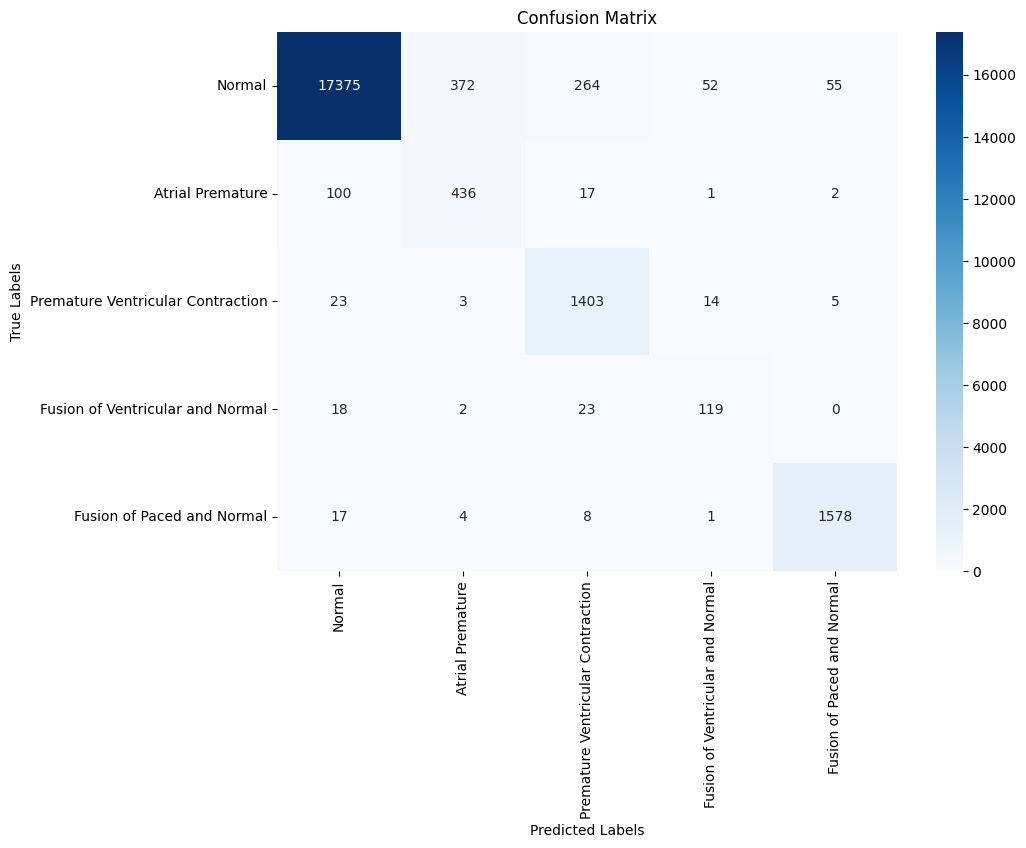

In [ ]:
# Import necessary libraries
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Make predictions
y_pred = best_model.predict(X_test_reshaped)
y_test_labels = np.argmax(y_test_encoded, axis=1)  # Convert one-hot encoded labels back to class labels
y_pred_labels = np.argmax(y_pred, axis=1)  # Convert predicted probabilities to class labels

# Create the confusion matrix
conf_matrix = confusion_matrix(y_test_labels, y_pred_labels)

# Plot the confusion matrix using Seaborn's heatmap
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=id_to_label.values(), yticklabels=id_to_label.values())
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()